<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [10]:
# Your code here
import pandas as pd

taxi_data = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
taxi_data[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [11]:
# Your code here
max_distance_index = taxi_data["trip_distance"].idxmax()
taxi_data.loc[max_distance_index][["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [12]:
# Your code here
meteorite_landings = pd.read_csv("data/Meteorite_Landings.csv").rename(columns = {"mass (g)":"mass"})
meteorite_landings.drop(["reclat", "reclong", "GeoLocation"], axis = 1, inplace = True)
meteorite_landings.sort_values("mass", ascending= False, inplace=True)
meteorite_landings

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [13]:
# Your code here
import numpy as np

meteorite_landings.year = meteorite_landings.year.str.slice(start = 6, stop = 10)
meteorite_landings.year = pd.to_numeric(meteorite_landings.year)
meteorite_landings["before1970"] = np.where(meteorite_landings["year"]< 1970, 1, 0)
meteorite_landings.set_index("id", inplace= True)
meteorite_landings.sort_values("id", inplace = True)

# there is no id equal to 10040
meteorite_landings.loc[10036:10040]


,name,nametype,recclass,mass,fall,year,before1970
id,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,1
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,1
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,0
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,1


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [14]:
# Your code here
# Found the NA rows
meteorite_landings[meteorite_landings.year.isna()]

,name,nametype,recclass,mass,fall,year,before1970
id,,,,,,,
2344,Asarco Mexicana,Valid,"Iron, IIIAB",NaN,Found,NaN,0
4902,Aus,Valid,L,30.2,Found,NaN,0
5012,Benares (b),Valid,Iron,NaN,Found,NaN,0
5191,Cacilandia,Valid,H6,NaN,Found,NaN,0
5199,California,Valid,"Iron, IAB-sLL",NaN,Found,NaN,0
...,...,...,...,...,...,...,...
56528,Jiddat al Harasis 796,Valid,L5,22.8,Found,NaN,0
56529,Jiddat Arkad 003,Valid,L5,148.0,Found,NaN,0
56530,Jiddat al Harasis 797,Valid,L5,249.0,Found,NaN,0


There's a meteorite that was reportedly found in the future:

In [15]:
# Your code here
# this says the year was 2101
meteorite_landings.sort_values("year", ascending=False).head(1)

,name,nametype,recclass,mass,fall,year,before1970
id,,,,,,,
57150,Northwest Africa 7701,Valid,CK6,55.0,Found,2101.0,0


_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [16]:
# Your code here
# convert to datetime column
taxi_data["tpep_dropoff_datetime"] = pd.to_datetime(taxi_data["tpep_dropoff_datetime"])

# resample by hour and calculate the sum of the 4 columns
taxi_data_by_hour = taxi_data.resample("h", on="tpep_dropoff_datetime")[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]].sum().reset_index()

# sort by tip amount and keep the top 5 and only print out the 5 hours
taxi_data_by_hour.sort_values("tip_amount", ascending=False).head(5)

,tpep_dropoff_datetime,trip_distance,fare_amount,tolls_amount,tip_amount
9,2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
10,2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
11,2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
8,2019-10-23 15:00:00,14.34,213.50,0.00,51.75
12,2019-10-23 19:00:00,98.59,268.00,24.48,25.74


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

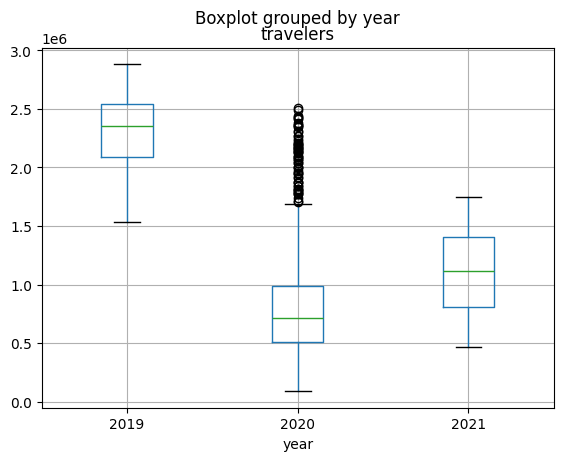

In [17]:
# Your code here
import matplotlib.pyplot as plt

tsa = pd.read_csv("data/tsa_melted_holiday_travel.csv")

tsa.boxplot(column = "travelers", by = "year")
plt.show()

<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

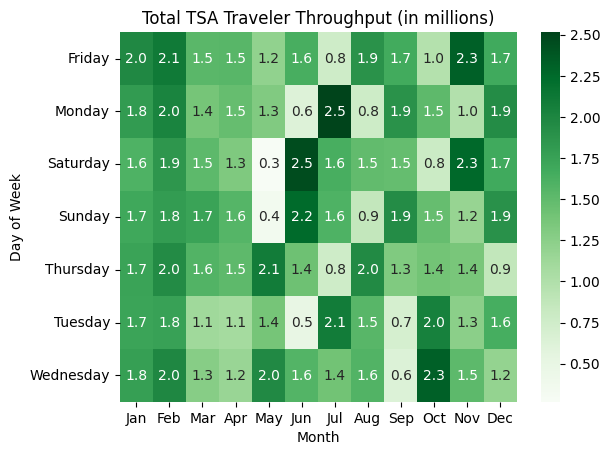

In [18]:
# Your code here
import seaborn as sns
import calendar

tsa_melted_holiday_travel = pd.read_csv(
    './data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)

data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month,
    day_of_week=lambda x: x.index.day_name(),   # e.g., Monday, Tuesday
    year=lambda x: x.index.year)\
    .pivot_table(index="day_of_week",
    columns="month",
    values="travelers",
    aggfunc="median")

data

ax = sns.heatmap(data=data / 1e6, cmap='Greens', annot=True, fmt='.1f')
_ = ax.set_xticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_title('Total TSA Traveler Throughput (in millions)')
_ = ax.set_ylabel('Day of Week')
_ = ax.set_xlabel('Month')
